Version 0.1 -> Probably some spelling errors and MST algo needs fixing. 

**TODO** 

* Write Camparsion section
* Fix The MST code
* Vehicle Routing Problem Research
* Clean up NN code
* Rename mts -> mst 
* Do more testing with two-opt run time 

*  Vertices are the intersections, Edges are the streets. Then use our ticket data as weights (frequency and monetary) for those edges along with distance, travel time.


# The problem

Parking authorties are walking along route to give tickets to cars. As of now they make their own route.
Is their own route the best possible route to take? How much time would one save if the generated route was used? 


# Minimum Spanning Tree

## What is it?

When given a [graph][2], in our case GPS locations, a [minimum spanning tree][1] 
is a set of edges that connects all the nodes with the least distance between them. 

[1]: https://en.wikipedia.org/wiki/Minimum_spanning_tree
[2]: https://en.wikipedia.org/wiki/Graph_(discrete_mathematics)

## Pros

* Fast computation
* Short path

## Cons

* Can create a route that visits the same node twice
* Maybe not most fesible for walking. 

    
    
## Kruskal Algorithim

[Kruskal Algorithim][4] is a way to obtain the minmum spanning tree of a graph. 

### How does it work

Krusal's is built on the principal of a [Disjoint-set Data structure] [3] (also known as a union-find)
Take a list of the edges sorted from smallest to longest edge and a [disjointed set][3] of vertices. 
Take the next smallest edge and see if the vertices the edge is connceted to is in the same tree in the 
disjointed-set. If the vertices are not in the same tree, connect the trees. Repeat until the graph is spanning 
or there are no more edges. 

### Sudocode 

`KRUSKAL(G):
1 A = ∅
2 foreach v ∈ G.V:
3    MAKE-SET(v)
4 foreach (u, v) in G.E ordered by weight(u, v), increasing:
5    if FIND-SET(u) ≠ FIND-SET(v):
6       A = A ∪ {(u, v)}
7       UNION(u, v)
8 return A`

[*Source*](https://en.wikipedia.org/wiki/Kruskal's_algorithm#Psudocode)

###  Complexity

E = edge, V = Vertices

#### Time 

O(E log V)

#### Space

O(V)

#### What this means for us

Given the sample data of greenvile (1726 gps locations) the program took 
**92.947 seconds** to run. 

A great result, the user would be able to click generate route and get something back 
within a few minutes. 

Although this is not using google maps to get the distance so it has been calculated 
without taking into consideration buildings and roads. This will add computation time since 
with 1726 gps cordinates, that will result in 1490401 calls to google maps. This has not yet 
been tested to see actual time.  


**Sidenote** 
*From looking at the output the implementation of the algrothim may be wrong. 
I will be looking into it shortly, and probably re-writing the Disjoint-set class.* 



[3]: https://en.wikipedia.org/wiki/Disjoint-set_data_structure
[4]: https://en.wikipedia.org/wiki/Kruskal%27s_algorithm



#### Output

Below shows the reslut of my implementation of the Kruskal's algorithim
with the greenvile data. The first graph is the orginal route taken, second
was run with Kruskal's algorithim. 

##### ERRORS
**There are some errors with my implementation at the moment. I beleive it has to do with the union in the disjoint-set implemation. I plan a re-write of the disjoint set. The interface will stay the same so the mts code will remain the same.** 

##### Orginal Path

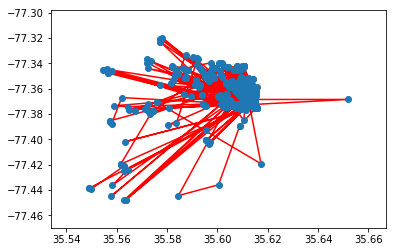

In [3]:
import sys
sys.path.append('../') 
import mts
mts.orginal_path("./greenville_clean_data.csv")


##### Kruskal Path

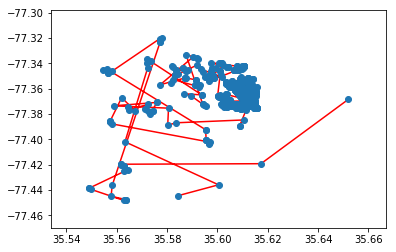

Run time (in seconds)  120.38107514381409


In [3]:
import time
import sys
sys.path.append('../') 
import mts

t0 = time.time()
mts.kruskal("./greenville_clean_data.csv")
t1 = time.time()
print("Run time (in seconds) ", t1-t0)

*** 
# Traveling Salesmen Problem

**The most studied optimization problem.**

[More Reading][1]

## What is it? 

The idea is simple. A salesmen has a list of cities he wants to visit, but he does not want
to waste his time. How would he only vist each city one in the shortest path possible? 


## Exact Solutions

Or the guarantee that the answer is the shortest route possilbe. 

### Brute Force

The simpliest idea. Try every different combination of paths to take. The issue
is the time complexity is O(n!). 

O(n!) grows extremely fast. A way to think about it is, with a deck of cards. There are 52 cards in a deck, 
this means there are 52! ways to shuffle a deck or *8.0658e67 possibilities*. If you have every human shuffle a deck 1 every second from the beggining of the known universe, you would not have the same combination of cards show up twice. 

So for our test data of 1726 points. This is not possible.

### Held-Karp

Held-karp is the fastest known exact algorthim known at this time and it runs in O(n<sup>2</sup>2<sup>n</sup>). 
This is still too slow for use. Using a super powerful computer it would still take much longer than 1 night
to run this. It is also [dynaminc algorthim][2] which will add complexity and the likelyhood of errors.


### Conclusion

Exact solutions will not work for our needs. They are far too slow.
How important is having the exact smallest distance to walk? This feature is a nicety, being slightly un-optimal should
have little to no affect. 

Another apporach will have to be made.  



[1]:https://en.wikipedia.org/wiki/Travelling_salesman_problem
[2]:https://en.wikipedia.org/wiki/Dynamic_programming 


## Heuristic Solutions

Also known as an [approximation algorithm][2], heuristic algorithms will not always get the most optimal route, 
but it will get close. Usually results are within 2-3% of the optimal route. 

### Nearest Neighbor (NN)

A [greedy algorithm][1] that can easily work off any distance formula. Two examples I have completed are euclidian 
distance and using google maps walking distance. 

The basic idea is to start at any point, find the closest node, move to the closest node, and repeat.


#### Sudocode

1. start on an arbitrary vertex as current vertex.
2. find out the shortest edge connecting current vertex and an unvisited vertex V.
3. set current vertex to V.
4. mark V as visited.
5. if all the vertices in domain are visited, then terminate.
6. Go to step 2

#### Complexity
E = Edge, V = Vertices 

##### Time 

O(V + E log E log log V)

In reality 1726 nodes runs in 5-10 seconds using Euclidian time.
~2hr using google maps api for walking distance. I was getting ~8calls/second.   

#### Space 

O(V) 


#### Pros 

* Speed - Extremely fast 

#### Cons

* On average yields a path 25% longer than the shortest possible path.
* Possible outcome could be the worst route.

#### Output



[1]: https://en.wikipedia.org/wiki/Greedy_algorithm
[2]:https://en.wikipedia.org/wiki/Approximation_algorithm


end time -> NN 224.015625


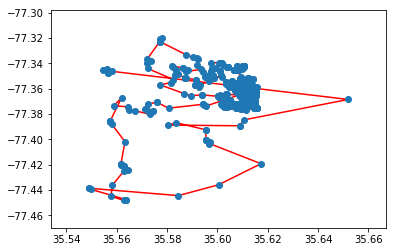

Path distance:  <built-in function sum>


<function sum(iterable, start=0, /)>

In [4]:
import sys
sys.path.append('../')
import gen_route_op as route

nodes = route.run_nn("./greenville_clean_data.csv")
route.find_tour_dist(nodes)

## 2-opt (Pairwise exchange) 

[Source][1]

 The main idea behind it is to take a route that crosses over itself and reorder it so that it does not. 
 It does this by taking two edges and replacing the edges with two different edges. It iteratively goes through
 the graph and provides a new graph with hopefully a shorter path and no crossovers. 
 
 Their are other variants of this solution, like 3-opt where the same is done but with 3 points. Or k-opt, where you have k number of swaps. With these improvement there are usually better results but with a much increased computation time. 

### Visual Example

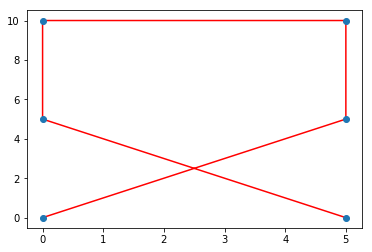

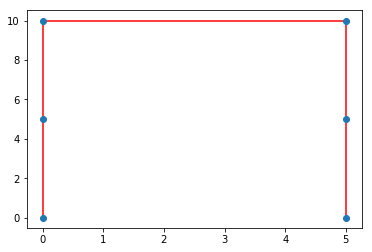

In [2]:
import sys
sys.path.append('../')
import two_opt as route

route.test()

### Two-opt Swap Example

   example route: A ==> B ==> C ==> D ==> E ==> F ==> G ==> H ==> A  
   example i = 4, example k = 7  
   new_route:  
       1. (A ==> B ==> C)  
       2. A ==> B ==> C ==> (G ==> F ==> E ==> D)  
       3. A ==> B ==> C ==> G ==> F ==> E ==> D (==> H ==> A)


### Sudocode

[Source][1]

#### Two-opt

  ` repeat until no improvement is made {
       start_again:
       best_distance = calculateTotalDistance(existing_route)
       for (i = 1; i < number of nodes eligible to be swapped - 1; i++) {
           for (k = i + 1; k < number of nodes eligible to be swapped; k++) {
               new_route = 2optSwap(existing_route, i, k)
               new_distance = calculateTotalDistance(new_route)
               if (new_distance < best_distance) {
                   existing_route = new_route
                   goto start_again
               }
           }
       }
   } `
   
#### Two-opt Swap 
   
   ` 2optSwap(route, i, k) {
   1 - take route[0] to route[i-1] and add them in order to new_route
   2 - take route[i] to route[k] and add them in reverse order to new_route
   3 - take route[k+1] to end and add them in order to new_route
   return new_route;
} `

### Complexity

V = Vertices 

#### Time 
 
2<sup>O(V)</sup>

#### Space 

O(V)

#### Reality 

With my implementation of the two-opt apporach I was not able to see the it complete in a work day ~8hrs.
There are apperently ways to make this faster but I was unable to do so with my initial tries. 

A possibe way to make this possible is to shrink the data. There are many nodes really close to each other. 
Since all our nodes are GPS locations of where tickets have been given, the nodes extremely close are on the
same street and can be removed. How this will be done without information loss is not yet known. But I believe it
should be fesible reduce the data points. 


### Pros

* A close aproximation of the optimal route. 
* Computation time should be able to improve

### Cons

* At this moment the computation is too long 
* Gives local minimum, not gobal minium
 
 
### Output

**With a fake smaller data set. (123 points)**

#### Orginal Path

 [1]:https://en.wikipedia.org/wiki/2-opt

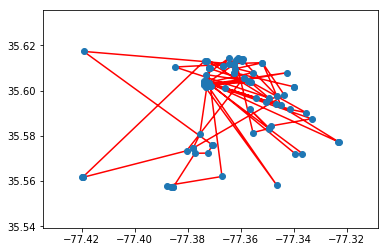

Route Distance of Orginal 


1.4406957845661903

In [2]:
import sys
sys.path.append('../')
import two_opt as route
import util as u

d_list = route.orginal_path("./test.csv")

print("Route Distance of Orginal ")
route.tour_cost(d_list)


#### Two-opt Path

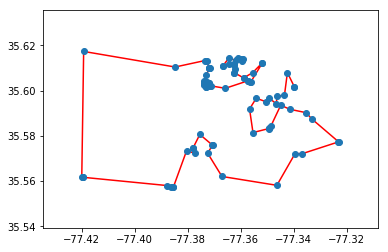

Run time (in seconds)  1250.9247949123383
Route Distance of Orginal 


0.41723186977651056

In [4]:
import sys
import time
sys.path.append('../')
import two_opt as route
import util as u

t0 = time.time()
data = u.read_csv_no_header("./test.csv")
data_list = route.data_to_list(data)
    
new_route = route.two_opt_algo(data_list)

route.plot(new_route)
t1 = time.time()
print("Run time (in seconds) ", t1-t0)

print("Route Distance of Orginal ")
route.tour_cost(new_route)


### Performance Increases

#### Completed 

##### Distance Algorithm

Eucledian distance is used to determine the distance between points. There are many ways to write this. Performce is known to be best with Einstien sumations,

`
def euclidean_dsit(a,b):
    a_min_b = a - b
    np.sqrt(np.einsum('ij,ij->i', a_min_b, a_min_b))
` 
A good write up on how einsum works can be found [here][2]
When running with 74 data points two-opt completed in 674.121 seconds. A decrease of 7.28% compared to the second fastest way to compute euclidean distance. 

The second fasted is with numpy's square and sum function written as so

` def euclidean_dist(x,y):
    return np.sqrt(np.sum((x-y)**2)) `
    
Time to run two-opt with 74 data points: 727.086 seconds 
    
Other attempts tried include scipy's 

` distance.euclidean(x,y) `

and lastly and using the math libary function's sqrt and the additon found in the prelude. 

` def euclidean_dist(p, q):
    return math.sqrt((p[0] - q[0]) ** 2 + (p[1] - q[1]) ** 2)
`
***
#### Ideas/todo

##### Parallelization

This is always a possibility. I need to look more into it to see if it is possible with this algrothim. My first thought is no. You are constantly changing the state of the best route and different threads would cause a data race with the best rotue. 

##### Calculating Distance

At this moment I am calculating the distance of the entire route every time a switch is completed to compare. If only the nodes that were switched were calculated it would decrease the number of iterations. The program spends most of it's time calculating the distance so improving this may be the best bet to make it faster. 

##### Use the GPU instead of CPU

Right now all calculations are done on the CPU, if we can move the calculations over to [cuda cores][1] there could be increase in preformence. Cuda core are built to do calculations like these and are more effiecent than cpu cores. This could be very hard to do. I have very little experience in working on the GPU and cuda cores. I do not know 

[1]:https://www.lifewire.com/what-is-nvidia-cuda-834095
[2]:http://ajcr.net/Basic-guide-to-einsum/

# Vehicle Routing Problem

This has a simliar idea to the Traveling Salesmen problem but with mutiple people able to move around and vist each point. Think of FedEx delivery people having to deliver packages to each of the homes. 

I have not looked into solutions and algorithims yet, but this could be a possible approach. 

# Human Preformance

Machines and automation are extremely powerful tools and can complete many jobs better than humans with less error faster. But what about find a route? Well the truth behind it is humans seem to be quite good at finding a good route. 

Humans are 1% less efficient for graphs with 10-20 nodes, and 11% more efficient for graphs with 120 nodes than basic heurstic algrorithms. 

The experiments provided information on
the quality of subjects’ solutions. Their solutions clustered close to the best known solutions, were
an order of magnitude better than solutions produced by three well-known heuristics, and on aver-
age fell beyond the 99.9th percentile in the distribution of random solutions. The solution process
appeared to be perceptually based. [[MACGREGOR AND ORMEROD 1996]](https://link.springer.com/content/pdf/10.3758/BF03213088.pdf)



# Conclusion 

## What algrothim is best? 

Out of the algrothims to go with they all have their advantages. If quick reaction with variable results, nearest neighbor is great. Minimiun spanning trees may be what some people are looking for. But for the best mathimatical result two-opt is the way to go, but is running overnight a fesible option? 

What if we have an option for the customer to select differt route types. Of coruse we do not state the exact names of the algoriths but we can do something along the lines of calculate using nearest neighbor and then have an option to try and improve it and will email when done. Then run two-opt on the data and return that result when done. That way they get instant satifaction and then an better answer mathimically. 

## Is this a useful feature? 

I don't have a strict answer for that. From a mathimatical sense probably not. The people who walk these routes probably have a pretty efficent route that they have refined over many hours of doing their job. But maybe not. 

From a marketing sense this could attract more customers. Saying we have AI to calculate efficent routes for the workers to do more work per day would be something people would want. It may not always be true that we can create a more effecent rotue but does that matter? 
